In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

file_path = "../data/raw/ikh_data_2025-01-11.csv"
df = pd.read_csv(file_path)
df["priceDate"] = pd.to_datetime(df["priceDate"])

df.head()

,priceDate,minPrice,avgPrice,maxPrice,item,market
0,2015-03-06,30000,30000,30000,광어,노량진
1,2015-03-14,30000,30000,30000,광어,노량진
2,2015-04-18,28000,29330,30000,광어,노량진
3,2015-04-28,30000,30000,30000,광어,노량진
4,2015-06-02,30000,30000,30000,광어,노량진


In [6]:
df[df["item"] == "연어"]

,priceDate,minPrice,avgPrice,maxPrice,item,market
9534,2024-11-05,40000,40000,40000,연어,노량진
9535,2025-01-03,35000,35000,35000,연어,노량진
9536,2025-01-06,35000,35000,35000,연어,노량진


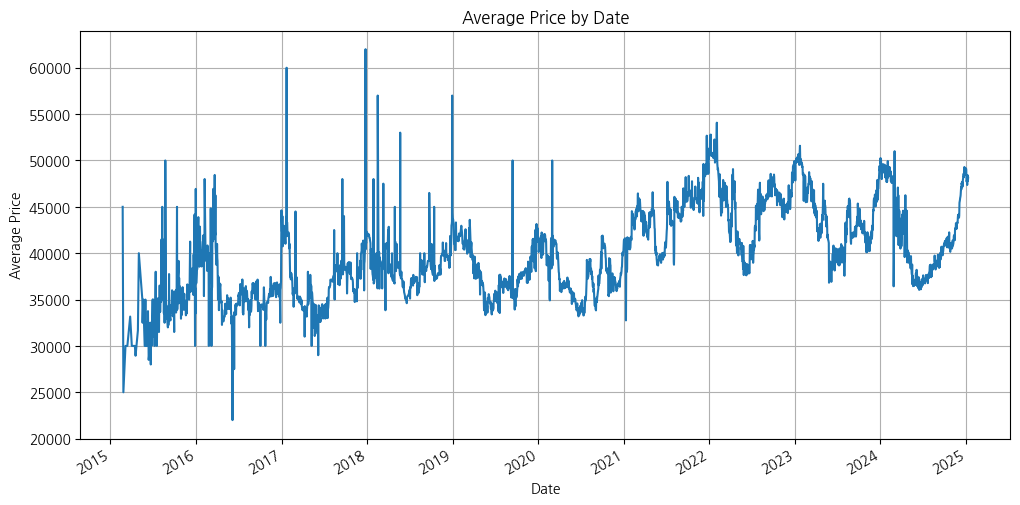

In [8]:
# 날짜별 평균 가격 시각화
df["priceDate"] = pd.to_datetime(df["priceDate"])
avg_price_by_date = df.groupby("priceDate")["avgPrice"].mean()

plt.figure(figsize=(12, 6))
avg_price_by_date.plot(title="Average Price by Date")
plt.ylabel("Average Price")
plt.xlabel("Date")
plt.grid()
plt.show()


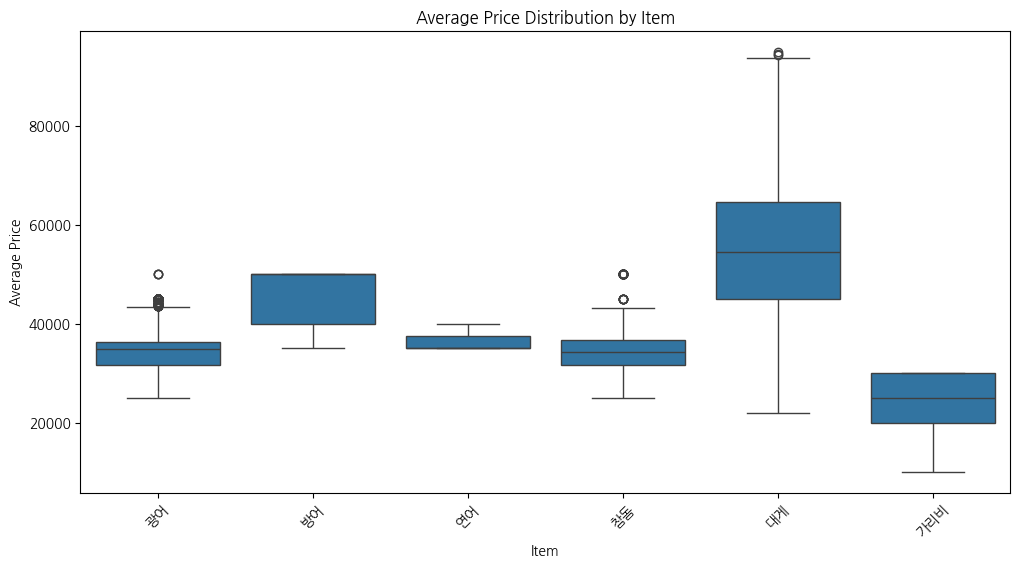

In [9]:
# 품목별 평균 가격 비교
plt.figure(figsize=(12, 6))
sns.boxplot(x="item", y="avgPrice", data=df)
plt.title("Average Price Distribution by Item")
plt.xlabel("Item")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

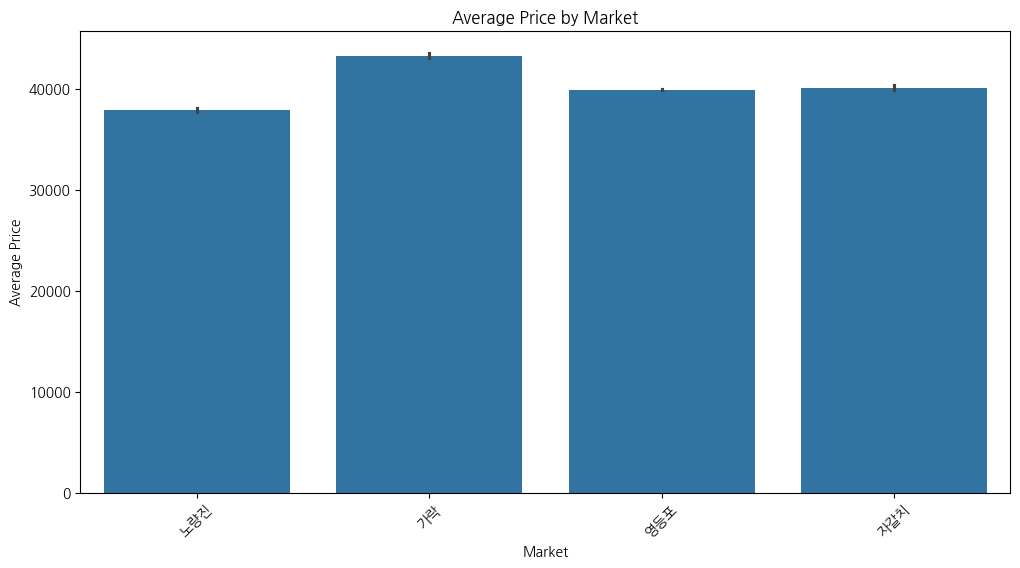

In [10]:
# 시장별 평균 가격 비교
plt.figure(figsize=(12, 6))
sns.barplot(x="market", y="avgPrice", data=df, estimator=lambda x: x.mean())
plt.title("Average Price by Market")
plt.xlabel("Market")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

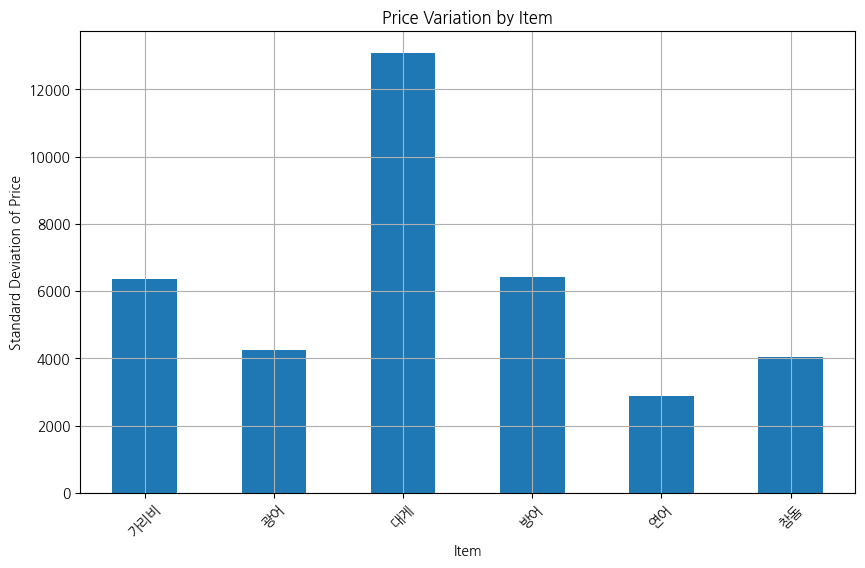

In [11]:
# 품목별 가격 변동성 확인
price_variation = df.groupby("item")["avgPrice"].std()

plt.figure(figsize=(10, 6))
price_variation.plot(kind="bar", title="Price Variation by Item")
plt.ylabel("Standard Deviation of Price")
plt.xlabel("Item")
plt.xticks(rotation=45)
plt.grid()
plt.show()

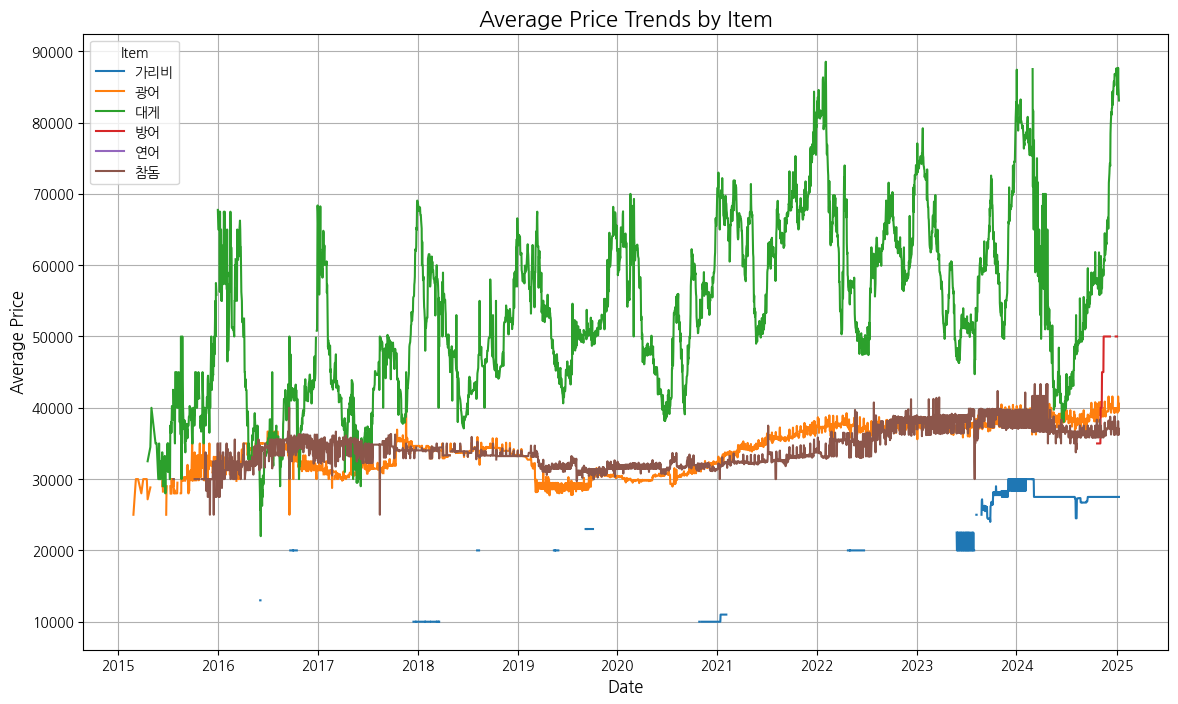

In [17]:
# 품목별 평균 가격 계산
item_price_trend = df.groupby(["priceDate", "item"])["avgPrice"].mean().unstack()

# 품목별 시간에 따른 가격 변화 플롯
plt.figure(figsize=(14, 8))
for column in item_price_trend.columns:
    plt.plot(item_price_trend.index, item_price_trend[column], label=column)

plt.title("Average Price Trends by Item", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.legend(title="Item", fontsize=10)
plt.grid()
plt.show()

In [32]:
# 전체 날짜 범위 생성
date_range = pd.date_range(start=df["priceDate"].min(), end=df["priceDate"].max())
print(f"전체날짜: {len(date_range)}")

# 품목별 누락된 날짜 찾기
missing_dates = {}

for item in df["item"].unique():
    # 해당 품목의 날짜 데이터
    item_dates = df[df["item"] == item]["priceDate"]
    
    # 누락된 날짜 계산
    missing_dates[item] = date_range.difference(item_dates)

# 누락된 날짜 출력
for item, dates in missing_dates.items():
    print(f"품목: {item} / \t누락된 날짜 수: {len(dates)}")


전체날짜: 3611
품목: 광어 / 	누락된 날짜 수: 379
품목: 방어 / 	누락된 날짜 수: 3557
품목: 연어 / 	누락된 날짜 수: 3608
품목: 참돔 / 	누락된 날짜 수: 476
품목: 대게 / 	누락된 날짜 수: 327
품목: 가리비 / 	누락된 날짜 수: 2741


In [29]:
print(f"전체날짜: {len(date_range)}")

# 품목-시장별 누락된 날짜 계산
missing_data = []
for (item, market), group in df.groupby(["item", "market"]):
    # 해당 품목-시장의 날짜 데이터
    item_market_dates = group["priceDate"]
    # 누락된 날짜 계산
    missing_dates = date_range.difference(item_market_dates)
    missing_count = len(missing_dates)
    
    # 결과 저장
    missing_data.append({"Item": item, "Market": market, "Missing Count": missing_count})
    
    # 누락된 날짜 출력
    print(f"품목: {item}, 시장: {market} / \t누락된 날짜 수: {missing_count}")


# DataFrame 생성
missing_df = pd.DataFrame(missing_data)


전체날짜: 3611
품목: 가리비, 시장: 가락 / 	누락된 날짜 수: 2955
품목: 가리비, 시장: 노량진 / 	누락된 날짜 수: 3000
품목: 광어, 시장: 가락 / 	누락된 날짜 수: 406
품목: 광어, 시장: 노량진 / 	누락된 날짜 수: 436
품목: 광어, 시장: 영등포 / 	누락된 날짜 수: 3190
품목: 광어, 시장: 자갈치 / 	누락된 날짜 수: 936
품목: 대게, 시장: 가락 / 	누락된 날짜 수: 398
품목: 대게, 시장: 노량진 / 	누락된 날짜 수: 490
품목: 대게, 시장: 영등포 / 	누락된 날짜 수: 3602
품목: 대게, 시장: 자갈치 / 	누락된 날짜 수: 1164
품목: 방어, 시장: 노량진 / 	누락된 날짜 수: 3557
품목: 연어, 시장: 노량진 / 	누락된 날짜 수: 3608
품목: 참돔, 시장: 가락 / 	누락된 날짜 수: 498
품목: 참돔, 시장: 노량진 / 	누락된 날짜 수: 611
품목: 참돔, 시장: 자갈치 / 	누락된 날짜 수: 948


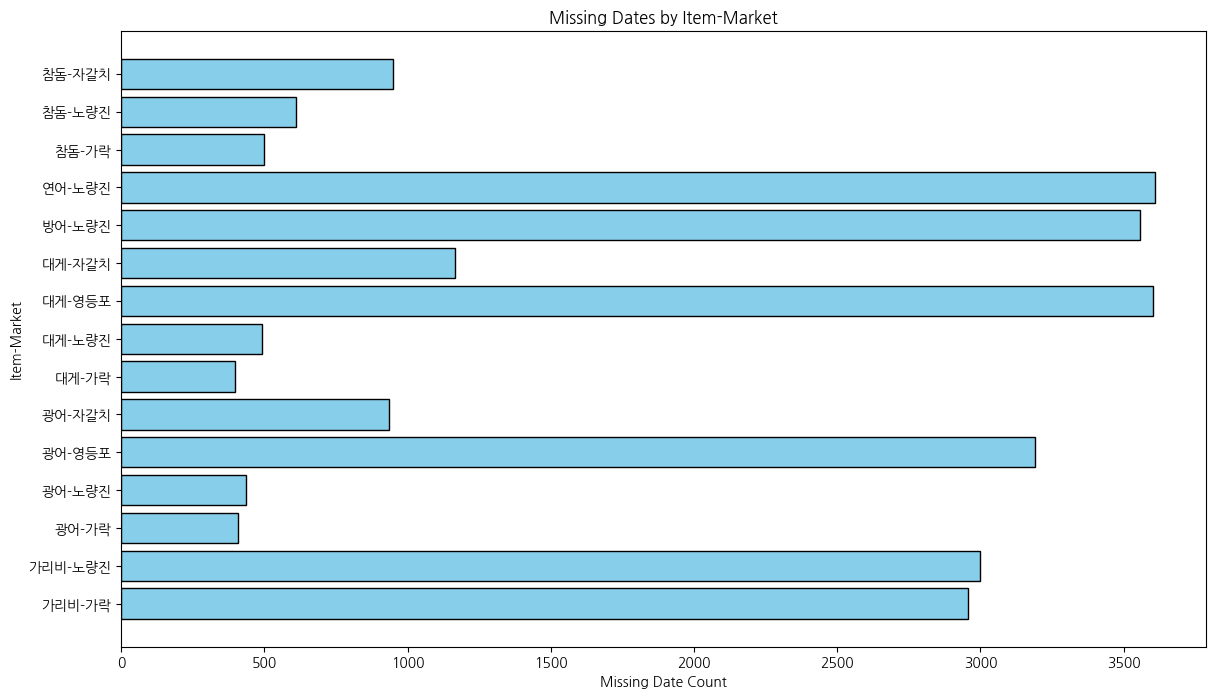

In [30]:
# 각 품목-시장별 누락된 날짜를 Gantt 스타일로 표현
fig, ax = plt.subplots(figsize=(14, 8))

for idx, ((item, market), group) in enumerate(df.groupby(["item", "market"])):
    # 전체 날짜
    all_dates = set(date_range)
    # 해당 품목-시장의 날짜
    existing_dates = set(group["priceDate"])
    # 누락된 날짜
    missing_dates = sorted(all_dates - existing_dates)
    
    # Gantt 스타일로 표시
    ax.barh(f"{item}-{market}", len(missing_dates), left=0, color="skyblue", edgecolor="black")

ax.set_title("Missing Dates by Item-Market")
ax.set_xlabel("Missing Date Count")
ax.set_ylabel("Item-Market")
plt.show()

In [22]:
# DataFrame 생성
missing_df = pd.DataFrame(missing)

# 히트맵 데이터로 변환
heatmap_data = missing_df.pivot("Item", "Market", "Missing Count").fillna(0)

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="g")
plt.title("Missing Dates by Item and Market")
plt.xlabel("Market")
plt.ylabel("Item")
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [23]:
missing

DatetimeIndex(['2015-02-22', '2015-02-23', '2015-02-24', '2015-02-25',
               '2015-02-26', '2015-02-27', '2015-02-28', '2015-03-01',
               '2015-03-02', '2015-03-03',
               ...
               '2024-09-17', '2024-09-18', '2024-10-01', '2024-10-15',
               '2024-10-29', '2024-11-05', '2024-11-19', '2024-12-03',
               '2024-12-17', '2025-01-07'],
              dtype='datetime64[ns]', length=948, freq=None)